In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
import re
import os
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<font size='2'><u>DOMAIN: Semiconductor manufacturing process<br></u>
<font size='2'>

• CONTEXT: A complex modern semiconductor manufacturing process is normally under constant surveillance via the monitoring of
signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a
specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise.
Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then
feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key
factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to
learning and reduce the per unit production costs. These signals can be used as features to predict the yield type. And by analysing and
trying out different combinations of features, essential signals that are impacting the yield type can be identified.

1. Import and understand the data. <br>
A. Import ‘signal-data.csv’ as DataFrame.  <br>
B. Print 5 point summary and share at least 2 observations. <br>

In [2]:
#1A) Import the file dataframe
signal=pd.read_csv('signal-data.csv')

In [3]:
pd.options.display.max_columns = None


In [4]:
signal.head()

,Time,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.00,2916.50,-4043.75,751.00,0.8955,1.7730,3.0490,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2000,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.0850,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.0010,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0.

In [5]:
#1B) 5 point summary
signal.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1564.0,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1557.000000,1567.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1543.000000,1543.000000,1566.0,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.0,1566.000000,1566.000000,1566.0,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1560.000000,1561.000000,1561.000000,1561.000000,1560.000000,1560.000000,1560.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.000000,773.000000,773.000000,1561.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1566.000000,1555.000000,226.000000,1567.000000,1567.000000,1567.000000,1516.000000,1516.000000,1561.000000,1565.000000,1565.000000,1561.000000,1561.000000,1561.000000,1561.0,1561.000000,1561.00000,1561.000000,1561.000000,1561.000000,1565.000000,1565.000000,1561.000000,1561.000000,1561.000000,1561.000000,549.000000,549.000000,549.000000,852.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1543.000000,1567.000000,1567.000000,1558.000000,1558.00000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1559.000000,1559.000000,1559.000000,1562.000000,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,1565.000000,1565.000000,1565.0

1B) Following are insights from above 5 point summary:<br>
a) It can be seen that there are multiple columns where values are missing.<br>
b) Some columns have only one value which is 0 (mean and standar deviation is 0).<br>
c) Pass/Fail column has mean of <0 indicating that percentage of fail is more than pass.<br>

2. Data cleansing: <br>
A. Write a for loop which will remove all the features with 20%+ Null values and impute rest with mean of the feature.<br>
B. Identify and drop the features which are having same value for all the rows. <br>
C. Drop other features if required using relevant functional knowledge. Clearly justify the same. <br>
D. Check for multi-collinearity in the data and take necessary action. <br>
E. Make all relevant modifications on the data using both functional/logical reasoning/assumptions. <br>

In [6]:
signal.isnull().sum()/len(signal)

Time         0.000000
0            0.003829
1            0.004467
2            0.008934
3            0.008934
               ...   
586          0.000638
587          0.000638
588          0.000638
589          0.000638
Pass/Fail    0.000000
Length: 592, dtype: float64

In [7]:
#2A) Lets see how many features have null values more than 20%
count1=0
for i in signal.columns:
    if (signal[i].isnull().sum()/len(signal))>0.2:
        count1=count1+1
        
print('No of features with null values more than 20% is',count1)

No of features with null values more than 20% is 32


Lets delete these columns as these may not contribute much to model.

In [8]:
#2A)Lets delete the above 32 columns and replace the null values of other columns with mean value

for i in signal.columns:
    if signal[i].isnull().sum()/len(signal)>0.2:
        del signal[i]
    
    else:
        if signal[i].dtypes=='float64':
            
            signal[i]=signal[i].fillna(signal[i].mean(),axis=0)


In [9]:

signal.shape

(1567, 560)

Total 32 features were removed from original data.

There were many columns where columns had only one value. Lets remove these columns as this do not have any impact on the Pass or Fail.

In [10]:
#2B) Remove features which have same value in all rows
for i in signal.columns:
    if signal[i].nunique()==1:
        del signal[i]

In [11]:
signal.shape

(1567, 444)

Almost 119 columns were removed as these had same value for row.

Time column seems to be not useful in this prediction as its more dependent on other sensor data than time of occurance of the event.

In [12]:
#2C) Removing other unnecessary features
del signal['Time']

In [13]:
signal.shape

(1567, 443)

In [14]:
#2D) Finding correlation between each features
cor = signal.corr()

In [15]:
cor

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,105,106,107,108,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,142,143,144,145,146,147,148,150,151,152,153,154,155,156,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,248,249,250,251,252,253,254,255,267,268,269,270,271,272,273,274,275,277,278,279,280,281,282,283,285,286,287,288,289,290,291,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,331,332,333,334,335,336,337,338,339,340,341,342,343,344,347,348,349,350,351,352,353,354,355,356,357,359,360,361,362,363,365,366,367,368,376,377,386,387,388,389,390,391,392,393,405,406,407,408,409,410,411,412,413,415,416,417,418,419,420,421,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,467,468,469,470,471,472,473,474,475,476,477,478,479,480,482,483,484,485,486,487,488,489,490,491,493,494,495,496,497,499,500,510,511,520,521,522,523,524,525,526,527,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.143840,0.004756,-0.007613,-0.011014,0.002270,0.031483,-0.052622,0.009045,0.006504,0.043533,0.010368,-0.007058,0.030675,-0.005749,0.012620,0.017691,-0.009036,0.025818,-0.011075,0.032206,-0.046678,-0.014921,0.108635,0.093011,0.107679,0.054548,-0.030896,-0.039582,-0.056821,-0.004650,-0.034059,-0.017681,-0.004547,0.017681,-0.035548,-0.042198,-0.034930,-0.009150,0.041140,-0.050244,0.053808,0.015586,-0.006066,-0.037736,0.004240,-0.019867,-0.050817,0.014760,0.022427,-0.024957,0.015580,-0.021475,-0.012668,-0.105184,-0.036578,0.033183,0.008042,-0.045524,-0.017521,-0.019591,-0.000433,-0.023074,0.033390,-0.001325,-0.000247,-0.029400,0.082446,0.025657,0.019703,0.071309,-0.116320,0.008496,0.039504,0.037037,0.006041,0.053891,-0.018618,0.050347,-0.029554,-0.012602,0.012107,0.014746,-0.008637,0.002915,-0.006473,-0.039649,0.015883,-0.032736,-0.059057,0.030595,-0.023468,-0.048221,-0.072173,0.055090,0.010532,-0.007731,-0.004561,-0.017357,0.018210,-0.007373,0.023283,0.056837,-0.000732,-0.012979,-0.011209,0.003984,-0.011106,0.000046,-0.019913,-0.029666,0.031758,-0.025205,-0.008687,-0.050305,-0.068553,0.012609,0.025537,0.031126,-0.007950,0.011741,-0.070572,0.157770,0.160297,-0.021708,0.001720,-0.011107,-0.007485,-0.001534,0.023829,-0.024410,-0.031770,-0.017754,0.000533,0.006545,-0.014213,0.003507,-0.030452,-0.009449,0.004902,0.041355,-0.037011,-0.003787,0.014089,0.063448,-0.043674,-0.057074,-0.054562,0.002139,0.029607,0.015250,0.049992,-0.006435,-0.024165,0.006419,0.036105,0.006373,0.027576,-0.013321,-0.043078,-0.002006,0.002082,0.030302,-0.023634,0.005199,-0.006813,-0.013009,-0.046557,0.020869,-0.023397,-0.019154,-0.023358,-0.016829,-0.029920,0.000113,-0.017513,-0.024940,-0.027469,-0.032856,-0.029400,-0.029298,-0.038483,-0.029400,-0.002695,-0.026033,-0.030144,-0.028135,0.026375,-0.013758,0.056332,-0.026708,-0.008392,-0.075330,-0.002259,-0.023660,-0.023147,-0.013934,-0.015300,-0.017097,-0.014558,-0.028739,-0.011036,-0.011551,-0.010954,0.008180,0.000172,-0.004230,-0.011692,0.000832,-0.083302,0.081371,-0.024374,0.034988,-0.069232,0.155582,0.151401,-0.012819,0.004790,-0.011100,-0.006209,-0.017224,0.022452,-0.017074,-0.025271,-0.017672,0.001747,0.000456,-0.018155,0.003504,-0.030561,-0.006483,0.005490,0.042210,-0.038470,-0.009218,0.013929,0.060713,-0.044931,-0.055494,-0.052486,-0.006074,0.031

<AxesSubplot:>

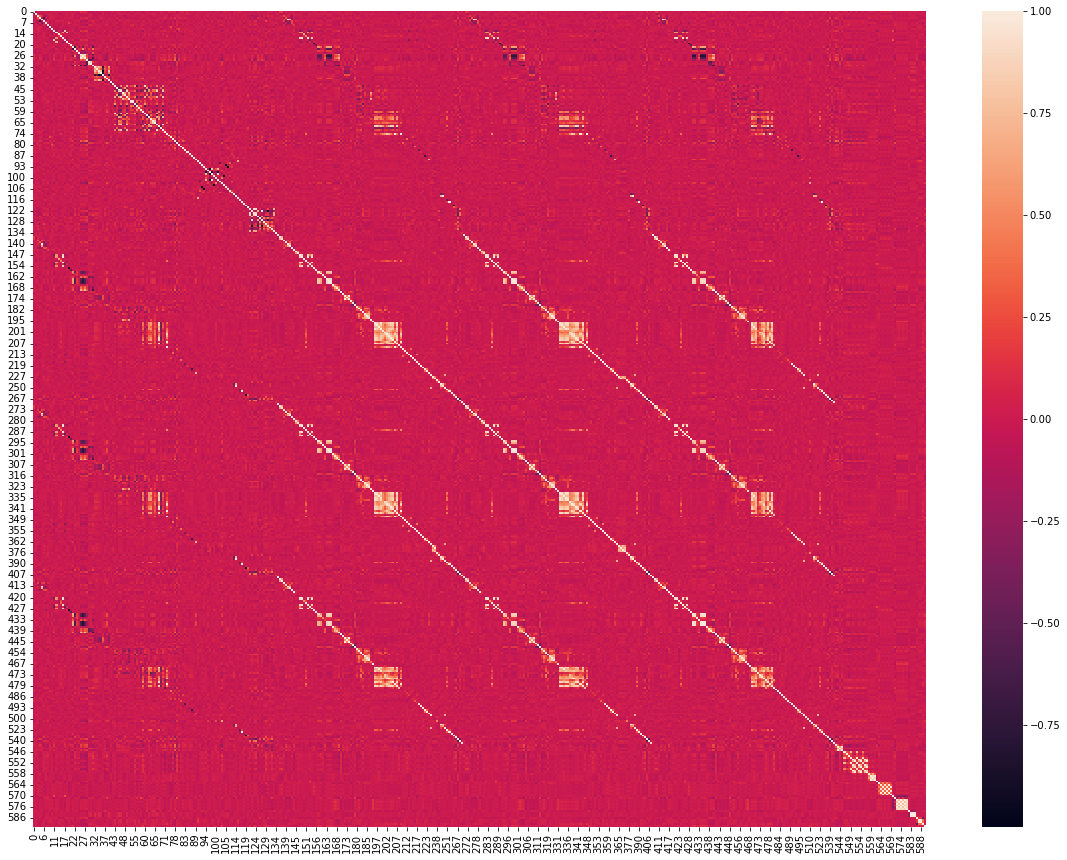

In [16]:
#heat map of the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(cor)


From above graph it can be seen that there are lot features which are highly correlated.<br>
It should be noted that highly correlated donot provide any extra information. Hence one of the features in highly correlated pair can be removed without loosing any much information.Assuming an absolute correlation of more than 0.8 as highly correlated we shall remove such features.

In [17]:
#2D) removing highly correlated features

# collecting one of features of pair of highly correlated features in list1
list1=[]
for i in range(len(cor)):
    for j in range(len(cor)):
        if i>j:
            if abs(cor.iloc[i,j])>0.8:
                
                list1.append(signal.columns[i])
                

set1=set(list1)
signal = signal.drop(columns=set1)

In [18]:
len(set1)

221

In [19]:
signal.shape

(1567, 222)

Almost 221 columns are removed which have high correlation with other features.

#2E) Other ways of reducing features further are using PCA, feature importance and also other modifications on data standardisation of data and balancing the data.<br>
These methods will be done at appropriate place further in the project (section 4 and 5).

3. Data analysis & visualisation: <br>
A. Perform a detailed univariate Analysis with appropriate detailed comments after each analysis. <br>
B. Perform bivariate and multivariate analysis with appropriate detailed comments after each analysis. <br>

([<matplotlib.patches.Wedge at 0x237f7b050a0>,
 [Text(-1.07617584854945, 0.22769616377724036, 'Pass'),
  Text(1.076175832560607, -0.22769623934638117, 'Fail')],
 [Text(-0.5870050082996998, 0.12419790751485836, '93%'),
  Text(0.5870049995785128, -0.12419794873438972, '7%')])

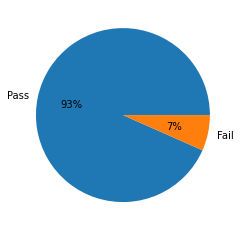

In [20]:
#3A) Univariate analysis
# Lets see the how target variable is distributed.
plt.pie(signal['Pass/Fail'].value_counts(normalize='True'),autopct='%.0f%%',labels=['Pass','Fail'])

<AxesSubplot:>

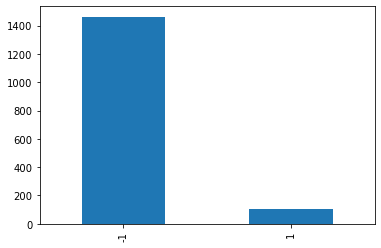

In [21]:
# Lets see the how target variable is distributed.
signal['Pass/Fail'].value_counts().plot(kind="bar")

From above it can be observed that fail percentage is around 7% only. The data is highly imbalanced w.r.t target variable.

<AxesSubplot:xlabel='1'>

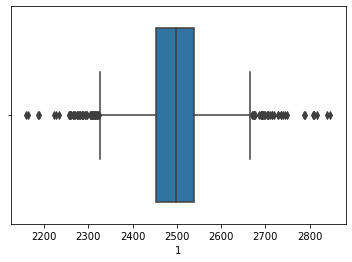

In [22]:
#lets check the distribution of some of the features
sns.boxplot(signal['1'])

<AxesSubplot:xlabel='0'>

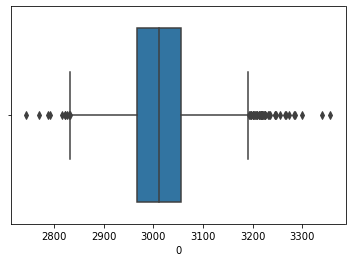

In [23]:
sns.boxplot(signal['0'])

It can be seen that there are significant amount of outliers in the data.

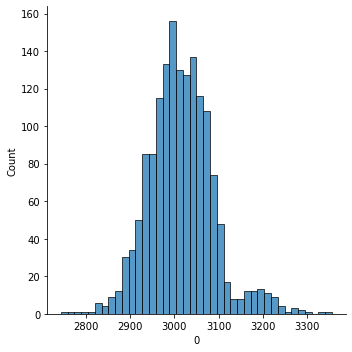

In [24]:
sns.displot(signal['0'])

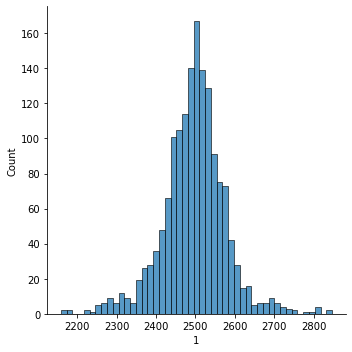

In [25]:
sns.displot(signal['1'])

<AxesSubplot:xlabel='0', ylabel='1'>

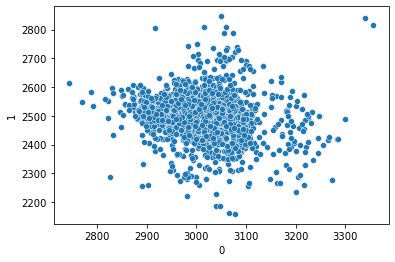

In [26]:
#3B) Bivariate analysis
#lets check the scattere plot of various features
sns.scatterplot(signal['0'],signal['1'])

<AxesSubplot:xlabel='0', ylabel='2'>

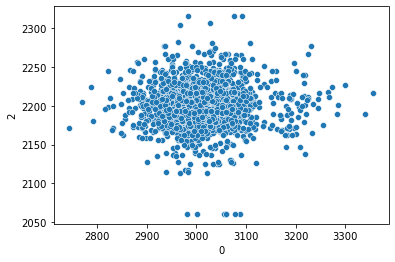

In [27]:
sns.scatterplot(signal['0'],signal['2'])

From above it can be seen that these features have no correlation among themselves.

<AxesSubplot:xlabel='0', ylabel='1'>

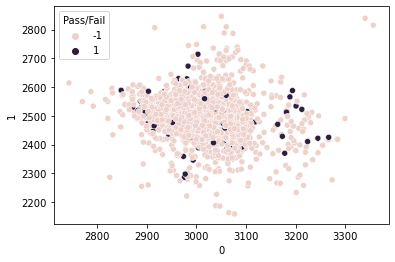

In [28]:
sns.scatterplot(signal['0'],signal['1'],hue=signal['Pass/Fail'])

<AxesSubplot:xlabel='0', ylabel='2'>

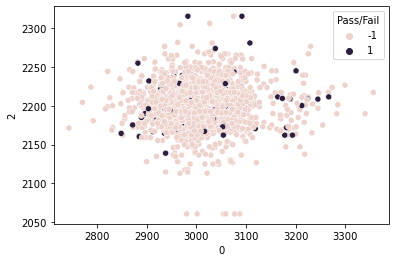

In [29]:
sns.scatterplot(signal['0'],signal['2'],hue=signal['Pass/Fail'])

From above plots it can be seen that since pass values of target variable are so low, no visible pattern can be seen w.r.t the above features.

Further pair plot can be generated but takes lot of time to plot as number of features is very high (222 features) and nothing can be deduced from those plots.

4. Data pre-processing: <br>
A. Segregate predictors vs target attributes. <br>
B. Check for target balancing and fix it if found imbalanced. <br>
C. Perform train-test split and standardise the data or vice versa if required.  <br>
D. Check if the train and test data have similar statistical characteristics when compared with original data.

In [30]:
#4A) Split data into X (feature) and Y(output)
X=signal.iloc[:,:-1]

Y=signal.iloc[:,-1]

In [31]:
#4C) Lets split data to train and test set first
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

Lets standardise the data using z score. It should be done after splitting data to avoid data leaking to test set.

In [32]:
#4C) standardizing the data
from scipy.stats import zscore

x_train_scaled  = x_train.apply(zscore)
x_test_scaled  = x_test.apply(zscore)

([<matplotlib.patches.Wedge at 0x237fa2f93d0>,
 [Text(-1.07617584854945, 0.22769616377724036, 'Pass'),
  Text(1.076175832560607, -0.22769623934638117, 'Fail')],
 [Text(-0.5870050082996998, 0.12419790751485836, '93%'),
  Text(0.5870049995785128, -0.12419794873438972, '7%')])

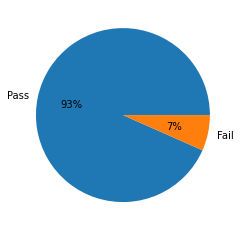

In [33]:
#4B) Lets see the distribution of the data as per target column
plt.pie(signal['Pass/Fail'].value_counts(normalize='True'),autopct='%.0f%%',labels=['Pass','Fail'])

Data is highly imbalanced and needs to be balanced using upsampling the data using SMOTE.

In [34]:
#4B) Balancing the scaled data.
from imblearn.over_sampling import SMOTE
print("Before UpSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label '-1': {} \n".format(sum(y_train==-1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x_train_scaled_up, y_train_up = sm.fit_resample(x_train_scaled, y_train.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y_train_up==1)))
print("After UpSampling, counts of label '-1': {} \n".format(sum(y_train_up==-1)))



print('After UpSampling, the shape of train_X: {}'.format(x_train_scaled_up.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_up.shape))

Before UpSampling, counts of label '1': 72
Before UpSampling, counts of label '-1': 1024 

After UpSampling, counts of label '1': 1024
After UpSampling, counts of label '-1': 1024 

After UpSampling, the shape of train_X: (2048, 221)
After UpSampling, the shape of train_y: (2048,) 



In [35]:
#4B)Undersampling
failed_tests = np.array(signal[signal['Pass/Fail'] == 1].index)
no_failed_tests = len(failed_tests)

print(no_failed_tests)

104


In [36]:
#4B)Undersampling
normal_indices = signal[signal['Pass/Fail'] == -1]
no_normal_indices = len(normal_indices)

print(no_normal_indices)

1463


In [37]:
#4B)Undersampling
random_normal_indices = np.random.choice(no_normal_indices, size = no_failed_tests, replace = True)
random_normal_indices_array = np.array(random_normal_indices)

print(len(random_normal_indices_array))

104


In [38]:
#4B)Undersampling
under_sample = np.concatenate([failed_tests, random_normal_indices])
print(len(under_sample))

208


In [39]:
undersample_data = signal.iloc[under_sample, :]

In [40]:

#4B)Undersampled data 
undersample_data

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,28,29,31,32,33,34,35,37,38,39,40,41,43,44,45,47,48,51,53,55,56,57,58,59,61,62,63,64,67,68,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,99,100,102,103,107,108,113,114,115,116,117,118,119,120,121,122,125,126,128,129,131,132,133,134,135,136,137,138,139,142,143,144,145,146,150,151,153,156,159,160,161,162,163,166,167,168,169,170,171,172,173,175,176,177,180,181,182,183,184,185,188,195,198,200,201,208,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,248,250,251,253,254,255,267,268,269,367,368,418,419,423,432,433,438,439,460,468,472,474,476,482,483,484,485,486,487,488,489,499,500,510,511,521,542,543,544,546,547,548,549,550,551,558,559,562,563,564,565,570,571,572,573,582,583,586,587,589,Pass/Fail
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,95.4878,0.1241,1.4436,0.0041,0.0013,0.9615,202.0179,9.5157,416.7075,9.3144,0.9674,192.7035,12.540400,1.4123,-5447.75,2701.75,-4047.00,-1916.50,1.3122,67.1333,2.3333,3.5986,84.7569,8.6590,50.1530,64.1114,65.8389,84.7327,118.6128,14.37,5.434,364.3782,9.8783,131.8027,1.2992,141.0845,185.7574,4.486,2936.0,0.9139,0.9447,4.5873,23.8245,10.1685,115.6273,11.3019,16.1755,0.8694,145.8000,84.7681,0.0,-0.0078,-0.0326,-0.0052,0.0213,-0.0054,-0.1134,-0.0182,0.0287,7.1041,0.1362,2.4532,0.9880,1685.8514,0.1497,9317.1698,0.0553,0.0006,-0.0013,0.0000,0.0002,0.1218,0.0006,0.0134,-0.0026,-0.0301,-0.0728,0.9231,0.0,718.5777,0.9899,58.4808,0.6015,0.9772,6.4527,15.90,2.882,0.8798,3.094,3.272,-0.1892,0.9978,2.2592,998.4440,42.0579,89.0,126.4,96.5,45.1001,306.0380,8.33,0.0038,0.0754,0.0483,0.0619,4.819,8.443,0.0177,0.0497,562.0,788.0,759.0,2100.0,0.187,2.1,1.4,0.123,0.319,1.0824,0.0369,0.3141,0.5753,0.9677,0.2706,0.326,17.78,0.745,13.31,22.9120,0.1959,9.21,60.110,0.139,0.949,16.73,5.09,79.618,0.0339,0.0494,0.0696,0.0406,0.0401,0.0840,0.0349,0.0718,2.4266,0.0014,0.0963,0.0152,182.4956,0.0284,839.6006,0.0192,0.0170,0.0062,0.0040,0.0273,104.4042,0.0007,0.0733,0.0063,0.4166,0.0487,29.621,3.9133,0.0030,0.0037,0.0000,0.0000,50.6425,18.7546,109.5747,60.0000,70.9161,32.3594,21.3645,148.0287,45.5423,13.3923,434.2674,151.7665,0.0000,190.3869,746.9150,74.0741,191.7582,250.1742,0.0000,0.0000,240.7767,244.2748,0.0,0.1096,0.0078,0.0026,0.79420,411.136000,74.654000,0.183200,16.160000,0.850000,1.5021,0.3718,267.064000,0.903200,1.100000,0.62190,535.0245,2.0293,11.2100,0.1882,0.4958,0.0157,0.0584,0.0484,82.8602,1
10,2994.05,2548.21,2195.1222,1046.1468,1.3204,103.3400,0.1223,1.5144,-0.0190,0.0013,0.9433,201.7125,11.8566,411.9572,10.2918,0.9664,191.4207,12.466300,1.4195,-2727.50,1400.00,-1976.00,360.50,0.4550,68.7111,1.9444,3.5029,84.7569,8.6590,50.1530,64.1114,65.8389,84.7327,118.6128,14.37,5.434,366.1545,10.3250,120.2818,0.9543,138.1345,113.0565,4.647,2891.0,0.9241,0.9425,4.4828,27.8373,10.6091,108.1191,7.8579,12.1627,0.8692,144.5955,112.0789,0.0,0.0035,-0.0530,0.0003,-0.0411,-0.0002,-0.0996,0.0011,0.0356,7.4902,0.1355,2.4532,0.9883,1732.2002,0.1669,8476.1700,0.0420,-0.0028,-0.0021,0.0000,0.0001,0.0149,0.0002,-0.0108,-0.0056,-0.0082,-0.0517,0.9380,0.0,636.9547,0.9906,58.5394,0.6004,0.9799,6.2058,15.75,3.148,0.9460,3.027,3.299,-0.5677,1.0010,2.3715,993.1274,38.1448,89.0,170.8,146.2,53.0999,380.5909,5.82,0.0037,0.1327,0.0512,0.0517,9.660,10.227,0.0183,0.0624,5655.0,2942.0,3967.0,776.0,0.921,2.2,1.0,0.116,0.107,1.0824,0.0369,0.3141,0.5753,0.9677,0.2706,0.326,16.15,0.323,13.20,23.3190,0.0963,3.04,34.253,4.617,0.477,17.24,4.07,118.057,0.0644,0.0527,0.0590,0.0667,0.0427,0.0969,0.0215,0.1047,2.3422,0.0035,0.0963,0.0087,68.0260,0.0713,1104.5000,0.0134,0.0128,0.0049,0.0039,0.0448,138.0032,0.0011,0.0293,0.0037,0.3820,0.0488,19.862,3.6163,0.0026,0.0024,269.3851,0.0000,81.4734,200.7591,215.2566,51.4286,70.0671,30.2973,14.6207,219.3969,39.6661,24.5336,0.0000,99.4809,0.0000,162.1884,0.0000,97.2892,0.0000,293.8947,474.3363,615.0150,87.1111,0.0000,0.0,0.1096,0.0078,0.0026,0.75170,411.648000,74.512000,0.244300,17.930000,0.890000,1.3569,0.7213,265.9

In [41]:
#target variables and features of undersample data
X_under=undersample_data.iloc[:,:-1]

Y_under=undersample_data.iloc[:,-1]

In [42]:
#train and test data for undersampling data
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(X_under, Y_under, test_size=0.30, random_state=1)

In [43]:
x_train_scaled_under  = x_train_under.apply(zscore)
x_test_scaled_under = x_test_under.apply(zscore)

In [44]:
del x_train_scaled_under['74']
del x_test_scaled_under['74']

In [45]:
#4D) Lets check statistically the similiarity between original data and split data (test and train)
X.describe()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,28,29,31,32,33,34,35,37,38,39,40,41,43,44,45,47,48,51,53,55,56,57,58,59,61,62,63,64,67,68,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,99,100,102,103,107,108,113,114,115,116,117,118,119,120,121,122,125,126,128,129,131,132,133,134,135,136,137,138,139,142,143,144,145,146,150,151,153,156,159,160,161,162,163,166,167,168,169,170,171,172,173,175,176,177,180,181,182,183,184,185,188,195,198,200,201,208,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,248,250,251,253,254,255,267,268,269,367,368,418,419,423,432,433,438,439,460,468,472,474,476,482,483,484,485,486,487,488,489,499,500,510,511,521,542,543,544,546,547,548,549,550,551,558,559,562,563,564,565,570,571,572,573,582,583,586,587,589
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.00000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.00000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,101.112908,0.121822,1.462862,-0.000841,0.000146,0.964353,199.956809,9.005371,413.086035,9.907603,0.971444,190.047354,12.481034,1.405054,-5618.393610,2699.378435,-3806.299734,-298.598136,1.203845,69.499532,2.366197,3.673189,85.337469,8.960279,50.582639,64.555787,66.221274,86.836577,118.679554,67.904909,3.353066,355.538904,10.031165,136.743060,1.177958,139.972231,157.420991,4.592971,2856.172105,0.928849,0.949215,4.593312,2.960241,10.423143,116.502329,13.989927,20.542109,16.715444,

In [46]:
#4D)
x_train.describe()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,28,29,31,32,33,34,35,37,38,39,40,41,43,44,45,47,48,51,53,55,56,57,58,59,61,62,63,64,67,68,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,99,100,102,103,107,108,113,114,115,116,117,118,119,120,121,122,125,126,128,129,131,132,133,134,135,136,137,138,139,142,143,144,145,146,150,151,153,156,159,160,161,162,163,166,167,168,169,170,171,172,173,175,176,177,180,181,182,183,184,185,188,195,198,200,201,208,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,248,250,251,253,254,255,267,268,269,367,368,418,419,423,432,433,438,439,460,468,472,474,476,482,483,484,485,486,487,488,489,499,500,510,511,521,542,543,544,546,547,548,549,550,551,558,559,562,563,564,565,570,571,572,573,582,583,586,587,589
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.00000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.00000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,3015.095303,2496.124663,2200.600815,1395.646769,4.408750,101.256541,0.121992,1.464154,-0.000843,-0.000046,0.964236,200.009573,9.052117,413.096452,9.933552,0.971187,190.073370,12.480379,1.404961,-5617.681016,2698.376714,-3764.363336,-299.539094,1.200825,69.543665,2.366615,3.678748,85.296397,8.921499,50.564770,64.525330,66.218852,86.849896,118.655469,67.468756,3.382252,355.517582,10.028200,136.926544,1.172345,139.922848,156.409301,4.592321,2855.996507,0.928678,0.94912,4.593181,2.994328,10.413060,116.717861,13.813842,20.486098,11.806196,

In [47]:
#4D)
x_test.describe()

,0,1,2,3,4,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,28,29,31,32,33,34,35,37,38,39,40,41,43,44,45,47,48,51,53,55,56,57,58,59,61,62,63,64,67,68,71,74,75,76,77,78,79,80,81,82,83,84,86,87,88,89,90,91,92,93,94,95,99,100,102,103,107,108,113,114,115,116,117,118,119,120,121,122,125,126,128,129,131,132,133,134,135,136,137,138,139,142,143,144,145,146,150,151,153,156,159,160,161,162,163,166,167,168,169,170,171,172,173,175,176,177,180,181,182,183,184,185,188,195,198,200,201,208,210,211,212,213,214,215,216,217,218,219,221,222,223,224,225,227,228,238,239,248,250,251,253,254,255,267,268,269,367,368,418,419,423,432,433,438,439,460,468,472,474,476,482,483,484,485,486,487,488,489,499,500,510,511,521,542,543,544,546,547,548,549,550,551,558,559,562,563,564,565,570,571,572,573,582,583,586,587,589
count,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.00000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000,471.000000
mean,3012.958038,2495.211636,2200.422832,1398.074982,3.704308,100.778680,0.121424,1.459855,-0.000836,0.000591,0.964624,199.834031,8.896593,413.061796,9.847220,0.972042,189.986814,12.482557,1.405271,-5620.051791,2701.709402,-3903.884217,-296.408560,1.210871,69.396838,2.365225,3.660254,85.433041,9.050518,50.624217,64.626660,66.226909,86.805582,118.735601,68.919822,3.285151,355.588517,10.038064,136.316099,1.191021,140.087144,159.775159,4.594484,2856.580714,0.929248,0.949436,4.593617,2.880924,10.446606,116.000793,14.399671,20.672446,28.139086,147.333664,104.084133,0.000023,-0.006434,-0.030762,-0.007832,-0.012409,0.004193,-0.020601,-0.022104,0.005855,7.454132,0.133121,2.403056,0.982415,1811.369933,0.187464,8840.232877,0.003310,0.000822,-0.000624,-0.000035,0.00

It can be observed from above tables, mean and standard deviation of each row is almost same indicating that statistical parameters are almost same in train and test datasets.

5. Model training, testing and tuning: <br>
A. Use any Supervised Learning technique to train a model.<br>
B. Use cross validation techniques. <br>
Hint: Use all CV techniques that you have learnt in the course.<br>
C. Apply hyper-parameter tuning techniques to get the best accuracy.<br>
Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.<br>
D. Use any other technique/method which can enhance the model performance. <br>
Hint: Dimensionality reduction, attribute removal, standardisation/normalisation, target balancing etc.<br>
E. Display and explain the classification report in detail. <br>
F. Apply the above steps for all possible models that you have learnt so far. <br>

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import pickle

In [49]:
#5A) Lets get accuracies of some of the base classification models
def classifier_models(x_train, x_test, y_train,y_test):
    
    classification_matrix={'model':['logistic regression','KN Neigbours classifier','Support vector classifier','Decision tree classifier','Ada Boost Classifier','gradient boosting classifier','random forest classifier'],
                            'accuracy':[],'f1_score':[]}
    #logistic regressio
    Log_reg = LogisticRegression()
    model1=Log_reg.fit(x_train, y_train)
    y_predict1=model1.predict(x_test)
    classification_matrix['accuracy'].append(accuracy_score(y_test, y_predict1))
    classification_matrix['f1_score'].append(f1_score(y_test, y_predict1,average=None).mean())

    #KN Neighbours
    KN_classifier = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
    model2=KN_classifier.fit(x_train, y_train)
    y_predict2=model2.predict(x_test)
    classification_matrix['accuracy'].append(accuracy_score(y_test, y_predict2))
    classification_matrix['f1_score'].append(f1_score(y_test, y_predict2,average=None).mean())

    #         #Support Vector classifier
    SV_classifier = svm.SVC(gamma=0.025, C=3)
    model3=SV_classifier.fit(x_train, y_train)
    y_predict3=model3.predict(x_test)
    classification_matrix['accuracy'].append(accuracy_score(y_test, y_predict3))
    classification_matrix['f1_score'].append(f1_score(y_test, y_predict3,average=None).mean())

    #Decision Tree classifier
    DTreeClassifier = DecisionTreeClassifier(criterion = 'gini', random_state=1)
    model4=DTreeClassifier.fit(x_train, y_train)
    y_predict4=model4.predict(x_test)
    classification_matrix['accuracy'].append(accuracy_score(y_test, y_predict4))
    classification_matrix['f1_score'].append(f1_score(y_test, y_predict4,average=None).mean())

    #ADABoost Classifier
    ADABoostClassifier = AdaBoostClassifier(n_estimators=10, random_state=1)
    model5=ADABoostClassifier.fit(x_train, y_train)
    y_predict5=model5.predict(x_test)
    classification_matrix['accuracy'].append(accuracy_score(y_test, y_predict5))
    classification_matrix['f1_score'].append(f1_score(y_test, y_predict5,average=None).mean())

    #Gradient Boosting Classifier

    GrBoostClassifier = GradientBoostingClassifier(n_estimators = 50,random_state=1)
    model6=GrBoostClassifier.fit(x_train, y_train)
    y_predict6=model6.predict(x_test)
    classification_matrix['accuracy'].append(accuracy_score(y_test, y_predict6))
    classification_matrix['f1_score'].append(f1_score(y_test, y_predict6,average=None).mean())

    #Random forest classifier
    RandForestClassifier = RandomForestClassifier()
    model7=RandForestClassifier.fit(x_train, y_train)
    y_predict7=model7.predict(x_test)
    classification_matrix['accuracy'].append(accuracy_score(y_test, y_predict7))
    classification_matrix['f1_score'].append(f1_score(y_test, y_predict7,average=None).mean())



    df1=pd.DataFrame.from_dict(classification_matrix)
    print(df1)
    best_model_classification=df1[df1['accuracy']==df1['accuracy'].max()]['model']

In [50]:
#5A) accuracy and f1 score of models for original data
classifier_models(x_train, x_test, y_train,y_test)


                          model  accuracy  f1_score
0           logistic regression  0.927813  0.481278
1       KN Neigbours classifier  0.934183  0.513251
2     Support vector classifier  0.932059  0.482418
3      Decision tree classifier  0.900212  0.561166
4          Ada Boost Classifier  0.932059  0.537896
5  gradient boosting classifier  0.932059  0.482418
6      random forest classifier  0.932059  0.482418


In [51]:
#5A) accuracy and f1 score of models for standardised data
classifier_models(x_train_scaled, x_test_scaled, y_train,y_test)

                          model  accuracy  f1_score
0           logistic regression  0.893843  0.540685
1       KN Neigbours classifier  0.929936  0.481848
2     Support vector classifier  0.932059  0.482418
3      Decision tree classifier  0.666667  0.439120
4          Ada Boost Classifier  0.934183  0.540054
5  gradient boosting classifier  0.929936  0.481848
6      random forest classifier  0.932059  0.482418


In [52]:
#5A) accuracy and f1 score of models for upscaled standardised data
classifier_models(x_train_scaled_up, x_test_scaled, y_train_up,y_test)

                          model  accuracy  f1_score
0           logistic regression  0.857749  0.547512
1       KN Neigbours classifier  0.254777  0.241636
2     Support vector classifier  0.932059  0.482418
3      Decision tree classifier  0.806794  0.542460
4          Ada Boost Classifier  0.728238  0.522887
5  gradient boosting classifier  0.787686  0.553808
6      random forest classifier  0.932059  0.511791


In [53]:
#5A) accuracy and f1 score of models for undersampled  data
classifier_models(x_train_under, x_test_under, y_train_under,y_test_under)

                          model  accuracy  f1_score
0           logistic regression  0.523810  0.486413
1       KN Neigbours classifier  0.634921  0.625485
2     Support vector classifier  0.571429  0.363636
3      Decision tree classifier  0.682540  0.682460
4          Ada Boost Classifier  0.476190  0.462652
5  gradient boosting classifier  0.619048  0.611111
6      random forest classifier  0.619048  0.611111


In [54]:
#5A) accuracy and f1 score of models for undersampled standardized data
classifier_models(x_train_scaled_under, x_test_scaled_under, y_train_under,y_test_under)

                          model  accuracy  f1_score
0           logistic regression  0.603175  0.596671
1       KN Neigbours classifier  0.619048  0.611111
2     Support vector classifier  0.571429  0.363636
3      Decision tree classifier  0.587302  0.586364
4          Ada Boost Classifier  0.539683  0.532138
5  gradient boosting classifier  0.634921  0.621176
6      random forest classifier  0.603175  0.592918


From above it can be seen that, F1 Score is good when undersampled data is used.
Lets check accuracies on train data using various CV techniques

In [55]:
#5B) Using various CV techniquies
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection  import StratifiedKFold, cross_val_score

In [56]:
#5B) using no of folds=3 to reduce execution time
k = 3
kfold = KFold(n_splits=k)
LOOCV=LeaveOneOut()
stratified_kfold = StratifiedKFold(n_splits = k)
Log_reg = LogisticRegression(random_state=1)
KN_classifier = KNeighborsClassifier()
SV_classifier = svm.SVC(random_state=1)
RandForestClassifier = RandomForestClassifier(random_state=1)
def cross_validations(x_train,y_train):
    model=[]
    CV=[]
    Avg_accuracy=[]
    classification_matrix_CV={'model':[Log_reg,KN_classifier,SV_classifier,RandForestClassifier],
                                'CV':[kfold,stratified_kfold],
                            }
 
    for i in classification_matrix_CV['model']:
        for j in classification_matrix_CV['CV']:
            results = cross_val_score(i,x_train, y_train, cv=j)
            
            model.append(i)
            CV.append(j)
            Avg_accuracy.append(np.mean(abs(results)))
            
            
    
    df2=pd.DataFrame({'model':model, 
                    'CV':CV,
                      'Avg accuracy':Avg_accuracy})
    
    return(df2)

In [57]:
#5B)Using CV techniques
x=cross_validations(x_train_scaled_up, y_train_up)
x

,model,CV,Avg accuracy
0,LogisticRegression(random_state=1),"KFold(n_splits=3, random_state=None, shuffle=F...",0.905796
1,LogisticRegression(random_state=1),"StratifiedKFold(n_splits=3, random_state=None,...",0.927250
2,KNeighborsClassifier(),"KFold(n_splits=3, random_state=None, shuffle=F...",0.548072
3,KNeighborsClassifier(),"StratifiedKFold(n_splits=3, random_state=None,...",0.586430
4,SVC(random_state=1),"KFold(n_splits=3, random_state=None, shuffle=F...",0.992189
5,SVC(random_state=1),"StratifiedKFold(n_splits=3, random_state=None,...",0.995117
6,RandomForestClassifier(random_state=1),"KFold(n_splits=3, random_state=None, shuffle=F...",0.953592
7,RandomForestClassifier(random_state=1),"StratifiedKFold(n_splits=3, random_state=None,...",0.994140


From above table we got best accuracy in Random forest with stratified K Fold CV.<br>
Else with normal K Fold Support vector classifiers is best.<br>
Also 'leave one out CV' was used but was taking lot of time to execute and hence not included in above analysis.

In [58]:
#5C) Using hyperparameter tuning techniques
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [59]:
#5C) Using hyperparameter tuning techniques-GridSearchCV
def param_grid(x):
    if x==Log_reg:
        y={'C':[0.1,1,10],'penalty':['l2','l1','none']}
        return y
    
    if x==KN_classifier:
        y={'leaf_size':[5,10,15],'weights':['uniform', 'distance']}
        return y
    
    if x==SV_classifier:
        y={'C':[0.1,1,10],'kernel':['linear', 'rbf']}
        return y
    
    if x==RandForestClassifier:
        y={'max_depth': [30, 40, 70], 'max_features': ['log2', 'sqrt'], 'min_samples_leaf': [1, 2, 4, 8]}
        return y
    
    


def GridSearch_CV(x_train, x_test, y_train,y_test):
    model=[]
    
    Train_accuracy=[]
    Test_accuracy=[]
    
    classification_matrix_search={'model':[Log_reg,KN_classifier,SV_classifier,RandForestClassifier]}
 
    for i in classification_matrix_search['model']:
        print(i)
        grid_search = GridSearchCV(i, param_grid=param_grid(i),cv=3)
        grid_search.fit(x_train,y_train)
        model.append(i)
        print(i)
        print('best parameter in',i,'is', grid_search.best_params_)
        
        Train_accuracy.append(grid_search.score(x_train,y_train))
        Test_accuracy.append(grid_search.score(x_test,y_test))
           
    
    df3=pd.DataFrame({'model':model, 
                    'Train_accuracy':Train_accuracy,
                      'Test_accuracy':Test_accuracy})
    print(df3)

In [60]:
#using oversampled and standardised data to get best results using Gridsearch
GridSearch_CV(x_train_scaled_up, x_test_scaled, y_train_up,y_test)

LogisticRegression(random_state=1)
LogisticRegression(random_state=1)
best parameter in LogisticRegression(random_state=1) is {'C': 0.1, 'penalty': 'none'}
KNeighborsClassifier()
KNeighborsClassifier()
best parameter in KNeighborsClassifier() is {'leaf_size': 5, 'weights': 'uniform'}
SVC(random_state=1)
SVC(random_state=1)
best parameter in SVC(random_state=1) is {'C': 10, 'kernel': 'rbf'}
RandomForestClassifier(random_state=1)
RandomForestClassifier(random_state=1)
best parameter in RandomForestClassifier(random_state=1) is {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 2}
                                    model  Train_accuracy  Test_accuracy
0      LogisticRegression(random_state=1)          1.0000       0.868365
1                  KNeighborsClassifier()          0.6875       0.254777
2                     SVC(random_state=1)          1.0000       0.929936
3  RandomForestClassifier(random_state=1)          1.0000       0.932059


In [61]:
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,classification_report

In [62]:
#getting the classification report of best case as seen above
model=RandomForestClassifier(max_depth= 30, max_features= 'log2', min_samples_leaf= 2)
model.fit(x_train_scaled_up,y_train_up)
predict=model.predict(x_test_scaled)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

          -1       0.93      1.00      0.96       439
           1       0.00      0.00      0.00        32

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



From above eventhough, accuracy is great recall is worst. So this is not a good model.

In [63]:
#using undersampled and standardised data to get best results using Gridsearch
GridSearch_CV(x_train_scaled_under,x_test_scaled_under,y_train_under,y_test_under)

LogisticRegression(random_state=1)
LogisticRegression(random_state=1)
best parameter in LogisticRegression(random_state=1) is {'C': 0.1, 'penalty': 'l2'}
KNeighborsClassifier()
KNeighborsClassifier()
best parameter in KNeighborsClassifier() is {'leaf_size': 5, 'weights': 'distance'}
SVC(random_state=1)
SVC(random_state=1)
best parameter in SVC(random_state=1) is {'C': 1, 'kernel': 'rbf'}
RandomForestClassifier(random_state=1)
RandomForestClassifier(random_state=1)
best parameter in RandomForestClassifier(random_state=1) is {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 8}
                                    model  Train_accuracy  Test_accuracy
0      LogisticRegression(random_state=1)             1.0       0.619048
1                  KNeighborsClassifier()             1.0       0.619048
2                     SVC(random_state=1)             1.0       0.587302
3  RandomForestClassifier(random_state=1)             1.0       0.523810


In [82]:
#getting the classification report of best case as seen above
model=RandomForestClassifier(max_depth= 30, max_features= 'sqrt', min_samples_leaf= 8)
model.fit(x_train_scaled_under,y_train_under)
predict=model.predict(x_test_scaled_under)
print(classification_report(y_test_under,predict))

              precision    recall  f1-score   support

          -1       0.62      0.48      0.54        27
           1       0.67      0.78      0.72        36

    accuracy                           0.65        63
   macro avg       0.64      0.63      0.63        63
weighted avg       0.65      0.65      0.64        63



From above classification report it can be seen that recall is better than oversampled model.

In [65]:
#5C) Using hyperparameter tuning techniques-RandomSearchCV
from scipy.stats import randint as sp_randint
def param_dist(x):
    if x==Log_reg:
        y={'C':sp_randint(0.1,10),'penalty':['l2','l1','none']}
        return y
    
    if x==KN_classifier:
        y={'leaf_size':sp_randint(5,15),'weights':['uniform', 'distance']}
        return y
    
    if x==SV_classifier:
        y={'C':sp_randint(0.1,10),'kernel':['linear', 'rbf']}
        return y
    
    if x==RandForestClassifier:
        y={'max_depth': sp_randint(30,70), 'max_features': ['log2', 'sqrt'], 'min_samples_leaf': sp_randint(1,8)}
        return y
    
    


def RandSearch_CV(x_train, x_test, y_train,y_test):
    model=[]
    
    Train_accuracy=[]
    Test_accuracy=[]

    
    classification_matrix_search={'model':[Log_reg,KN_classifier,SV_classifier,RandForestClassifier]}
 
    for i in classification_matrix_search['model']:
        print(i)
        randomCV = RandomizedSearchCV(i, param_distributions=param_dist(i),cv=3,n_iter=3)
        randomCV.fit(x_train,y_train)
        model.append(i)
        print(i)
        print('best parameter in',i,'is', randomCV.best_params_)
        
        Train_accuracy.append(randomCV.score(x_train,y_train))
        Test_accuracy.append(randomCV.score(x_test,y_test))
        
           
    
    df4=pd.DataFrame({'model':model, 
                    'Train_accuracy':Train_accuracy,
                      'Test_accuracy':Test_accuracy})
    print(df4)

In [66]:
#using oversampled and standardised data to get best results using Randomsearch
RandSearch_CV(x_train_scaled_up, x_test_scaled, y_train_up,y_test)

LogisticRegression(random_state=1)
LogisticRegression(random_state=1)
best parameter in LogisticRegression(random_state=1) is {'C': 3, 'penalty': 'none'}
KNeighborsClassifier()
KNeighborsClassifier()
best parameter in KNeighborsClassifier() is {'leaf_size': 13, 'weights': 'distance'}
SVC(random_state=1)
SVC(random_state=1)
best parameter in SVC(random_state=1) is {'C': 1, 'kernel': 'rbf'}
RandomForestClassifier(random_state=1)
RandomForestClassifier(random_state=1)
best parameter in RandomForestClassifier(random_state=1) is {'max_depth': 38, 'max_features': 'log2', 'min_samples_leaf': 2}
                                    model  Train_accuracy  Test_accuracy
0      LogisticRegression(random_state=1)             1.0       0.868365
1                  KNeighborsClassifier()             1.0       0.254777
2                     SVC(random_state=1)             1.0       0.929936
3  RandomForestClassifier(random_state=1)             1.0       0.932059


In [67]:
#getting the classification report of best case as seen above
model=RandomForestClassifier(max_depth= 38, max_features= 'log2', min_samples_leaf= 2)
model.fit(x_train_scaled_up,y_train_up)
predict=model.predict(x_test_scaled)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

          -1       0.93      1.00      0.97       439
           1       1.00      0.03      0.06        32

    accuracy                           0.93       471
   macro avg       0.97      0.52      0.51       471
weighted avg       0.94      0.93      0.90       471



From above eventhough, accuracy is great recall is worst. So this is not a good model.

In [68]:
#using undersampled and standardised data to get best results using Randomsearch
RandSearch_CV(x_train_scaled_under,x_test_scaled_under,y_train_under,y_test_under)

LogisticRegression(random_state=1)
LogisticRegression(random_state=1)
best parameter in LogisticRegression(random_state=1) is {'C': 6, 'penalty': 'none'}
KNeighborsClassifier()
KNeighborsClassifier()
best parameter in KNeighborsClassifier() is {'leaf_size': 6, 'weights': 'distance'}
SVC(random_state=1)
SVC(random_state=1)
best parameter in SVC(random_state=1) is {'C': 6, 'kernel': 'linear'}
RandomForestClassifier(random_state=1)
RandomForestClassifier(random_state=1)
best parameter in RandomForestClassifier(random_state=1) is {'max_depth': 52, 'max_features': 'sqrt', 'min_samples_leaf': 2}
                                    model  Train_accuracy  Test_accuracy
0      LogisticRegression(random_state=1)             1.0       0.603175
1                  KNeighborsClassifier()             1.0       0.619048
2                     SVC(random_state=1)             1.0       0.571429
3  RandomForestClassifier(random_state=1)             1.0       0.555556


In [85]:
#getting the classification report of best case as seen above
model=RandomForestClassifier(max_depth= 52, max_features= 'sqrt', min_samples_leaf= 2)
model.fit(x_train_scaled_under,y_train_under)
predict=model.predict(x_test_scaled_under)
print(classification_report(y_test_under,predict))

              precision    recall  f1-score   support

          -1       0.69      0.41      0.51        27
           1       0.66      0.86      0.75        36

    accuracy                           0.67        63
   macro avg       0.67      0.63      0.63        63
weighted avg       0.67      0.67      0.65        63



From above classification report it can be seen that recall is better than oversampled model.
This is best recall we got so far.

In [70]:
#5D) Applying PCA on the data
from sklearn.decomposition import PCA

pca = PCA(0.9)
pca.fit(x_train_scaled)
Xpca=pca.transform(x_train_scaled)
Xpca_df_train=pd.DataFrame(Xpca)

In [71]:
len(pca.components_)

133

Using PCA we have reduced the featutures to 133 features to get 90% variance.

In [72]:
#Lets use the PCA to build the models
Xpca1=pca.transform(x_test_scaled)
Xpca_df_test=pd.DataFrame(Xpca1)

In [73]:
#Using PCA transformed data for Randomsearch CV
RandSearch_CV(Xpca_df_train, Xpca_df_test, y_train,y_test)

LogisticRegression(random_state=1)
LogisticRegression(random_state=1)
best parameter in LogisticRegression(random_state=1) is {'C': 7, 'penalty': 'l2'}
KNeighborsClassifier()
KNeighborsClassifier()
best parameter in KNeighborsClassifier() is {'leaf_size': 13, 'weights': 'distance'}
SVC(random_state=1)
SVC(random_state=1)
best parameter in SVC(random_state=1) is {'C': 5, 'kernel': 'linear'}
RandomForestClassifier(random_state=1)
RandomForestClassifier(random_state=1)
best parameter in RandomForestClassifier(random_state=1) is {'max_depth': 44, 'max_features': 'log2', 'min_samples_leaf': 5}
                                    model  Train_accuracy  Test_accuracy
0      LogisticRegression(random_state=1)        0.950730       0.908705
1                  KNeighborsClassifier()        1.000000       0.929936
2                     SVC(random_state=1)        0.952555       0.929936
3  RandomForestClassifier(random_state=1)        0.935219       0.932059


In [74]:
#Using best model from above search to print classification report
model=RandomForestClassifier(max_depth= 58, max_features= 'sqrt', min_samples_leaf= 5)
model.fit(Xpca_df_train,y_train)
predict=model.predict(Xpca_df_test)

print(classification_report(y_test,predict))

              precision    recall  f1-score   support

          -1       0.93      1.00      0.96       439
           1       0.00      0.00      0.00        32

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



Eventhough accuracy is good, recall is not great.

In [75]:
#Using scaled and oversampled data to reduce features
pca = PCA(0.9)
pca.fit(x_train_scaled)
Xpca=pca.transform(x_train_scaled_up)
Xpca_df_train=pd.DataFrame(Xpca)
Xpca1=pca.transform(x_test_scaled)
Xpca_df_test=pd.DataFrame(Xpca1)

In [76]:
#Using scaled and oversampled data from above PCA to get best accuracy
RandSearch_CV(Xpca_df_train, Xpca_df_test, y_train_up,y_test)

LogisticRegression(random_state=1)
LogisticRegression(random_state=1)
best parameter in LogisticRegression(random_state=1) is {'C': 3, 'penalty': 'l2'}
KNeighborsClassifier()
KNeighborsClassifier()
best parameter in KNeighborsClassifier() is {'leaf_size': 7, 'weights': 'uniform'}
SVC(random_state=1)
SVC(random_state=1)
best parameter in SVC(random_state=1) is {'C': 8, 'kernel': 'rbf'}
RandomForestClassifier(random_state=1)
RandomForestClassifier(random_state=1)
best parameter in RandomForestClassifier(random_state=1) is {'max_depth': 52, 'max_features': 'log2', 'min_samples_leaf': 1}
                                    model  Train_accuracy  Test_accuracy
0      LogisticRegression(random_state=1)        0.916016       0.808917
1                  KNeighborsClassifier()        0.726074       0.288747
2                     SVC(random_state=1)        1.000000       0.932059
3  RandomForestClassifier(random_state=1)        1.000000       0.932059


In [77]:
#Using best model from above search to print classification report
model=RandomForestClassifier(max_depth= 39, max_features= 'log2', min_samples_leaf= 2)
model.fit(Xpca_df_train,y_train_up)
predict=model.predict(Xpca_df_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

          -1       0.93      1.00      0.96       439
           1       0.00      0.00      0.00        32

    accuracy                           0.93       471
   macro avg       0.47      0.50      0.48       471
weighted avg       0.87      0.93      0.90       471



In [78]:
#Using scaled and undersampled data to reduce features
pca = PCA(0.9)
pca.fit(x_train_under)
Xpca=pca.transform(x_train_under)
Xpca_df_train=pd.DataFrame(Xpca)
Xpca1=pca.transform(x_test_under)
Xpca_df_test=pd.DataFrame(Xpca1)

#5E) and #5F) Classification reports and most of the classification (logistic regression, KNN, SVC, random forest) are used above using classifier, crossvalidation, Grid Search CV and Random search CV functions.

6. Post Training and Conclusion: <br>
A. Display and compare all the models designed with their train and test accuracies. <br>
B. Select the final best trained model along with your detailed comments for selecting this model. <br>
C. Pickle the selected model for future use.<br>
D. Write your conclusion on the results.<br>

#6A) Test accurcies and training accuracies are displayed at each point while building the models.

##### 6B)Best model in this problem which has best recall (classification problem with unbalanced data). Hence best model from above analysis is random forest with following hyperparameters:<br>
max_depth= 52, max_features= 'log2', min_samples_leaf= 2<br>
<u>Best recall was found using above classifier with undersampled data.</u>

In [86]:
#best model for best recall
model=RandomForestClassifier(max_depth= 52, max_features= 'log2', min_samples_leaf= 2)
model.fit(x_train_scaled_under,y_train_under)

RandomForestClassifier(max_depth=52, max_features='log2', min_samples_leaf=2)

In [87]:
#6C) Pickle the model.
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

#6D) Following insights in this problem:<br>
a) Huge no of features can be reduced effictively to use the data for predictions.<br>
b) In this problem statement, undersampling data performed better.<br>
c) Random search CV gave better search of hyperparameters.<br>
d) Eventhough PCA reduced dimensions, recall score was not improved much.
